# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = "Piotr Cięgotura, Wojciech Sutowicz, Brunon Kania, Filip Magnowski"
#COLLABORATORS = ""

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [2]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
#raise NotImplementedError()
HP=pd.read_csv("dane_tymczasowe_HP 1.csv")
M=pd.read_csv("dane_tymczasowe_M 1.csv")
R=pd.read_csv("dane_tymczasowe_R.csv")

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
# YOUR CODE HERE
#raise NotImplementedError()
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
   
    dx=(x_lim[1]-x_lim[0])/grid[1]
    dy=(y_lim[1]-y_lim[0])/grid[0]
    
    x=np.linspace(0.5*dx,x_lim[1]-(0.5*dx),grid[1])
    y=np.linspace(0.5*dy,y_lim[1]-(0.5*dy),grid[0])
    #x=np.linspace(5,x_lim[1],(grid[1]+1))
    #y=np.linspace(5,y_lim[1],(grid[0]+1))
    
    d1,d2=np.meshgrid(x,y)
 
    
    for i in range(d1.shape[0]):
        for j in range(d2.shape[1]):
            d1[i,j]+= np.random.uniform(-0.5*dx,0.5*dx)*random_component
            d2[i,j]+=np.random.uniform(-0.5*dy,0.5*dy)*random_component
    
    
    
    d = {'X': np.concatenate(d1), 'Y': np.concatenate(d2)}
    df = pd.DataFrame(data=d)     

    return df
R=regular_on_rectangle([15,15],0.75,[0,10],[0,10])
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
   
    # YOUR CODE HERE
    #raise NotImplementedError()
    area = (max(x_lim)-min(x_lim))*(max(y_lim)-min(y_lim))

    n = sp.stats.poisson.rvs(intensity*area, size=1)
  
    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)

    xs = x*(x_lim[1]-x_lim[0])+x_lim[0]
    ys = y*(y_lim[1]-y_lim[0])+y_lim[0]
    
    df=pd.DataFrame()
    df['X']=xs
    df['Y']=ys
    return df
HP=homogeneous_poisson_on_rectangle(2.5,[0,10],[0,10])
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
   
    bufor = cluster_radius
    area = (max(x_lim)-min(x_lim)+2*bufor)*(max(y_lim)-min(y_lim)+2*bufor)
    n = sp.stats.poisson.rvs(parent_intensity*area, size=1)
    print(n)
    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)
   
    xs = x*(x_lim[1]-x_lim[0]+bufor*2)+(x_lim[0]-bufor)
    ys = y*(y_lim[1]-y_lim[0]+bufor*2)+(y_lim[0]-bufor) #punkty srodkow okrengow
    
    area = (max(x_lim)-min(x_lim)+2*bufor)*(max(y_lim)-min(y_lim)+2*bufor)
    n = sp.stats.poisson.rvs(daughter_intensity*area, size=1)
   
    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)
   
    xw = x*(x_lim[1]-x_lim[0]+bufor*2)+(x_lim[0]-bufor)
    yw = y*(y_lim[1]-y_lim[0]+bufor*2)+(y_lim[0]-bufor) #punkty wygerenowane przed wykasowaniem

    #usuwanie punktow
    arr=0
    for i in range(0,len(xw)):
        for j in range(0,len(xs)):#
            if ((xs[j]-xw[i])**2+(ys[j]-yw[i])**2)**0.5<cluster_radius:
                arr = np.append(arr, i)#indeksy ktore maja zostac
          
    
  
    ar=0
  
    for i in range(0,len(arr)):
        if arr[i-1]==arr[i]:
            ar = np.append(ar, i)
    
    arr = np.delete(arr,ar)# te indeksy mają zostać
    xr=0
    yr=0
    for i in range(0,len(arr)):
        xr = np.append(xr, xw[arr[i]])
        yr = np.append(yr, yw[arr[i]])
    
    xr = np.delete(xr,0)
    yr = np.delete(yr,0)
    arxn=0 #kasowanie punktow poza przedzialem wykresu
    for i in range(0,len(xr)): 
        if xr[i]<x_lim[0]:
            arxn=np.append(arxn,i)
        if xr[i]>x_lim[1]:
            arxn=np.append(arxn,i)
        if yr[i]<y_lim[0]:
            arxn=np.append(arxn,i)
        if yr[i]>y_lim[1]:
            arxn=np.append(arxn,i)
            
    xr=np.delete(xr,arxn)        
    yr=np.delete(yr,arxn)
    
    df=pd.DataFrame()
    df['X']=xr
    df['Y']=yr

    return df

M=materna_on_rectangle(0.3,5,0.75,[0,10],[0,10])




[54]


### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [6]:
def g_function(points): #tu generuje dane
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G. #dla każdej unikalnej wartości, czyli ile jest mnijejszych bądź równych tych wartości/liczba wszystkich wartości
    """   
    # YOUR CODE HERE
    #raise NotImplementedError()
 
   
    d=0

    for i in range(len(points)):
    
        df=np.array([[points['X'][i],points['Y'][i]]])
        odl=sp.spatial.distance.cdist(df,points)
        odl=np.sort(odl)
        odl=np.delete(odl,0)
     
        d=np.append(d,odl[0])
 

    d=np.sort(d)
    du=np.unique(d)
    #funkcja G
    g=0
  
    for i in range(0,len(du)):
        ilosc=0
        for j in range(0,len(points)):
            if d[j]<=du[i]:
                ilosc+=1
        g = np.append(g, ((ilosc)/len(points)))
    

    g = np.delete(g,0)

    df=pd.DataFrame()
    df['D']=du
    df['G']=g
           
    return df
    
    
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    #raise NotImplementedError()
    import math 
    G=0
    for i in range(0,len(d)):
        G = np.append(G, (1-2.71828182845904**(-intensity*3.141592653589793*(d[i])**2)))
    
    G = np.delete(G,0)
    
    df=pd.DataFrame()
    df['D']=d
    df['G']=G
           
    return df
    
    

#### b) Wygenerowanie danych

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
m=g_function(M)
mm=g_function_poisson(m['D'],2.5)
hp=g_function(HP)
hphp=g_function_poisson(hp['D'],2.5)

r=g_function(R)
rr=g_function_poisson(r['D'],2.5)


#### c) Wizualizacja

Text(0, 0.5, 'G')

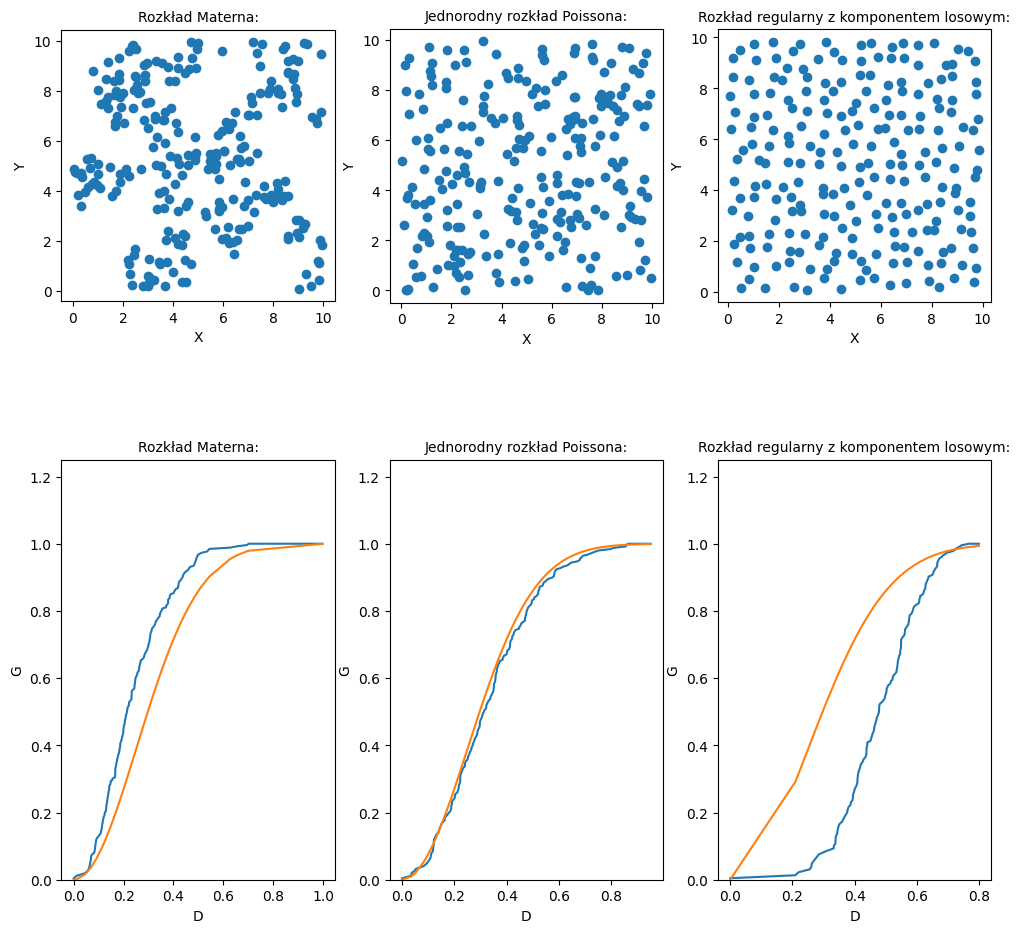

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()

#plt.plot(m['D'],m['G']) #to niebieskie
#plt.plot(mm['D'],mm['G']) #to zulte
#plt.xlabel("X")
#plt.ylabel("Y")
fig, ax = plt.subplots(2,3,figsize=(12,12))

ax[0,0].scatter(data=M,x="X",y="Y")
ax[0,0].set_title("Rozkład Materna:",size = 10)
ax[0,0].set_aspect('equal')
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].scatter(data=HP,x="X",y="Y")
ax[0,1].set_title("Jednorodny rozkład Poissona:",size = 10)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].scatter(data=R,x="X",y="Y")
ax[0,2].set_title("Rozkład regularny z komponentem losowym:",size = 10)
ax[0, 2].set_aspect('equal')
ax[0, 2].set_xlabel("X")
ax[0, 2].set_ylabel("Y")

ax[1,0].plot(m['D'],m['G'])
ax[1,0].plot(mm['D'],mm['G'])
ax[1,0].set_ylim(0, 1.25)
ax[1,0].set_title("Rozkład Materna:",size = 10)
ax[1,0].set_xlabel("D")
ax[1,0].set_ylabel("G")

ax[1,1].plot(hp['D'],hp['G'])
ax[1,1].plot(hphp['D'],hphp['G'])
ax[1,1].set_ylim(0, 1.25)
ax[1,1].set_title("Jednorodny rozkład Poissona:",size = 10)
ax[1,1].set_xlabel("D")
ax[1,1].set_ylabel("G")

ax[1,2].plot(r['D'],r['G'])
ax[1,2].plot(rr['D'],rr['G'])
ax[1,2].set_ylim(0, 1.25)
ax[1,2].set_title("Rozkład regularny z komponentem losowym:",size = 10)
ax[1,2].set_xlabel("D")
ax[1,2].set_ylabel("G")

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [7]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    area = (max(x_lim)-min(x_lim))*(max(y_lim)-min(y_lim))
   
    n = sp.stats.poisson.rvs(intensity*area, size=1)

    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)

    xs = x*(x_lim[1]-x_lim[0])+x_lim[0]
    ys = y*(y_lim[1]-y_lim[0])+y_lim[0]
    
    df=pd.DataFrame()
    df['X']=xs
    df['Y']=ys
    return df




def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y". regularny/lub jednorodny 
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    #raise NotImplementedError()
    #spatial.distance.cdistspatial.distance.cdistspatial.distance.cdistspatial.distance.cdistspatial.distance.cdistspatial.distance.cdist
    #d=0

    #for i in range(0,len(test_points)):
    
     #   df=np.array([[test_points['X'][i],test_points['Y'][i]]])
     #   odl=sp.spatial.distance.cdist(df,points)
     #   odl=np.sort(odl)
     #   odl=np.delete(odl,0)
     
     #   d=np.append(d,odl[0])
 

    #d=np.sort(d)
    #du=np.unique(d)  #tu jest odleglosc do najblizszego somsiada
    #forforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforforfor
    
    d=0
    dt=0
    dt1=((test_points['X'][0]-points['X'][0])**2+(test_points['Y'][0]-points['Y'][0])**2)**0.5
    
    for i in range(0,len(test_points)):
        
        for j in range(0,len(points)):
            dt=((test_points['X'][i]-points['X'][j])**2+(test_points['Y'][i]-points['Y'][j])**2)**0.5
            if dt<dt1:
                dt1=dt
    
        d=np.append(d,dt1)
        dt1=((test_points['X'][i]-points['X'][0])**2+(test_points['Y'][i]-points['Y'][0])**2)**0.5
    
    #d=np.delete(d,0)
    du=np.unique(d)
    #du=d
    #funkcja G
    g=0
  
    for i in range(0,len(du)):
        ilosc=0
        for j in range(0,len(points)):
            if d[j]<=du[i]:
                ilosc+=1
        g = np.append(g, ((ilosc)/len(points)))
    

    #g = np.delete(g,0)

    d = dict( D=du, F=g )
    
    df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
           
    return df
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    #raise NotImplementedError()
  
    G=0
    for i in range(0,len(d)):
        G = np.append(G, (1-2.71828182845904**(-intensity*3.141592653589793*(d[i])**2)))
    
    G = np.delete(G,0)
    
    df=pd.DataFrame()
    df['D']=d
    df['F']=G
           
    return df

#### b) Wygenerowanie danych

In [20]:
# YOUR CODE HERE
#raise NotImplementedError()
test_points=homogeneous_poisson_on_rectangle(3.5,[0,10],[0,10])
d=f_function(M,test_points)
dd=f_function_poisson(d['D'],2.5)

b=f_function(HP,test_points)
bb=f_function_poisson(b['D'],2)

c=f_function(R,test_points)
cc=f_function_poisson(c['D'],2)

#### c) Wizualizacja

Text(0, 0.5, 'F')

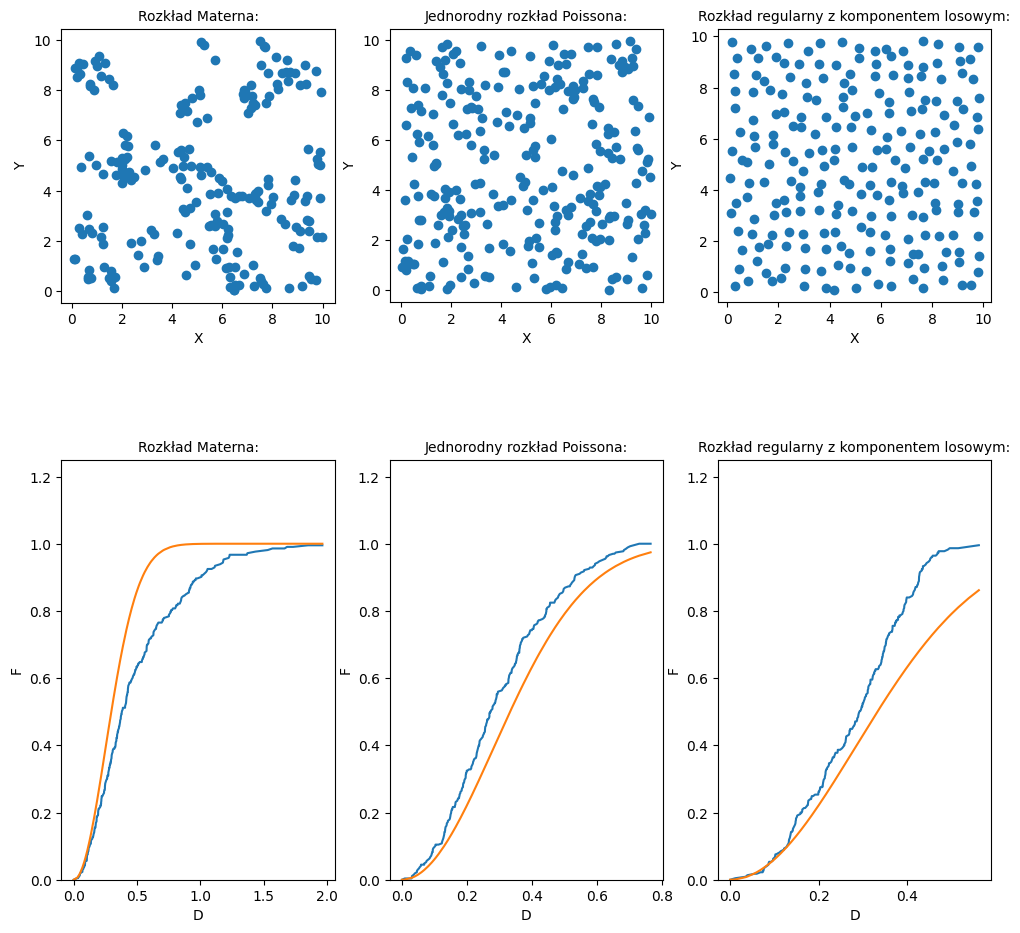

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots(2,3,figsize=(12,12))

ax[0,0].scatter(data=M,x="X",y="Y")
ax[0,0].set_title("Rozkład Materna:",size = 10)
ax[0,0].set_aspect('equal')
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].scatter(data=HP,x="X",y="Y")
ax[0,1].set_title("Jednorodny rozkład Poissona:",size = 10)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[0,2].scatter(data=R,x="X",y="Y")
ax[0,2].set_title("Rozkład regularny z komponentem losowym:",size = 10)
ax[0,2].set_aspect('equal')
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")

ax[1,0].plot(d['D'],d['F'])
ax[1,0].plot(dd['D'],dd['F'])
ax[1,0].set_ylim(0, 1.25)
ax[1,0].set_title("Rozkład Materna:",size = 10)
ax[1, 0].set_xlabel("D")
ax[1, 0].set_ylabel("F")

ax[1,1].plot(b['D'],b['F'])
ax[1,1].plot(bb['D'],bb['F'])
ax[1,1].set_ylim(0, 1.25)
ax[1,1].set_title("Jednorodny rozkład Poissona:",size = 10)
ax[1, 1].set_xlabel("D")
ax[1, 1].set_ylabel("F")

ax[1,2].plot(c['D'],c['F'])
ax[1,2].plot(cc['D'],cc['F'])
ax[1,2].set_ylim(0, 1.25)
ax[1,2].set_title("Rozkład regularny z komponentem losowym:",size = 10)
ax[1, 2].set_xlabel("D")
ax[1, 2].set_ylabel("F")
